<a href="https://colab.research.google.com/github/welisonwtnb/DeepLearning/blob/main/ImageClassifierWithCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models


In [17]:
# prepare data - using CIFAR10 dataset
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()

In [18]:
# normalize the data -> instead of (0 to 255) to (0 to 1)
training_images, testing_images = training_images / 255, testing_images / 255


<function matplotlib.pyplot.show(close=None, block=None)>

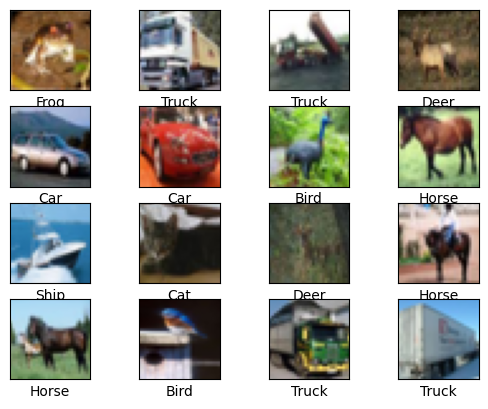

In [36]:
# display images
class_names = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

for i in range(16):
  plt.subplot(4, 4, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(training_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[training_labels[i][0]])
plt.show

In [21]:
# separete between training and testing
training_images = training_images[:20000]
training_labels = training_labels[:20000]
testing_images = testing_images[:4000]
testing_labels = testing_labels[:4000]


In [22]:
# create the convolutional base and add dense layers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [ ]:
# compile, and train the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))

loss, accuracy = model.evaluate(testing_images, testing_labels)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

model.save('image_classifier.model')

In [ ]:
# load model
model = models.load_model('image_classifier.model')

1/1 [==============================] - 0s 43ms/step


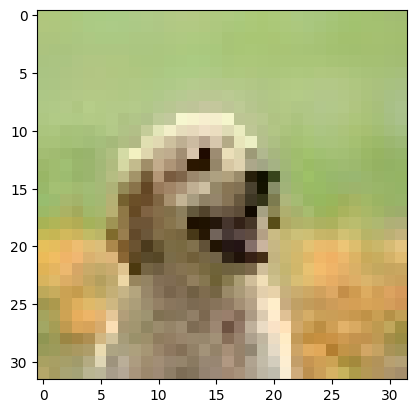

Dog


In [41]:
# testing
img = cv.imread('dog.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img, cmap=plt.cm.binary)

# Pass 'img' as an argument to np.array()
prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)
plt.show()
print(class_names[index])